# Laboratorio #5 - Parte 2

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [184]:
trainDf = pd.read_csv("Train_data.csv")

In [93]:
testDf = pd.read_csv("Test_data.csv")

## Exploracion de datos

In [94]:
trainDf.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [95]:
testDf.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,private,REJ,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00
1,0,tcp,private,REJ,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71


In [96]:
trainDf.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:ylabel='Frequency'>

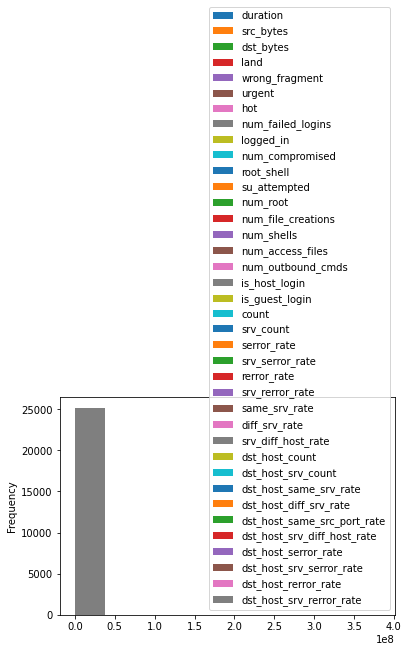

In [97]:
trainDf.plot.hist()

In [149]:
trainDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [76]:
trainDf["class"].value_counts()

normal     13449
anomaly    11743
Name: class, dtype: int64

## Preprocesamiento

In [185]:
# Aplicamos Label Encoding a nuestro target 
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
trainDf["class"]= labelEncoder.fit_transform(trainDf["class"])
target = trainDf['class']
trainDf = trainDf.drop(columns=['class'])
target

0        1
1        1
2        0
3        1
4        1
        ..
25187    0
25188    0
25189    0
25190    0
25191    0
Name: class, Length: 25192, dtype: int32

In [186]:
# Separamos los datos categoricos y aplicamos Hot Encoding hacia las columnas categoricasd
categoricalColumns = trainDf.select_dtypes(exclude=[np.number])
categoricalColumns

,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF
...,...,...,...
25187,tcp,exec,RSTO
25188,tcp,ftp_data,SF
25189,tcp,private,REJ
25190,tcp,nnsp,S0


In [198]:
for col in categoricalColumns:
    print(categoricalColumns[col].value_counts())

tcp     20526
udp      3011
icmp     1655
Name: protocol_type, dtype: int64
http         8003
private      4351
domain_u     1820
smtp         1449
ftp_data     1396
             ... 
urh_i           4
red_i           3
pm_dump         3
tim_i           2
http_8001       1
Name: service, Length: 66, dtype: int64
SF        14973
S0         7009
REJ        2216
RSTR        497
RSTO        304
S1           88
SH           43
S2           21
RSTOS0       21
S3           15
OTH           5
Name: flag, dtype: int64


In [187]:
print(list(categoricalColumns.columns))
#categoricalColumns = categoricalColumns.drop(columns=['class'])
#print(list(categoricalColumns.columns))

['protocol_type', 'service', 'flag']


In [ ]:
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(bridge_df[['Bridge_Types_Cat']]).toarray())
# merge with main df bridge_df on key values
bridge_df = bridge_df.join(enc_df)
bridge_df

In [193]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')
categorical_df = pd.DataFrame(ohe.fit_transform(trainDf[list(categoricalColumns.columns)]).toarray())
categorical_df.head()

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [204]:
#Comentar las primeras 2 lineas para luego observar el hot encoding en proceso
#trainDf = trainDf.join(categorical_df)
#trainDf = trainDf.drop(columns=list(categoricalColumns.columns))
trainDf.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,70,71,72,73,74,75,76,77,78,79
0,0,491,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,146,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0,232,8153,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,199,420,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [209]:
# select the float columns
df_float = trainDf.select_dtypes(include=[np.float])
df_float.head()

,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,...,70,71,72,73,74,75,76,77,78,79
0,0.0,0.0,0.0,0.0,1.00,0.00,0.00,0.17,0.03,0.17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,0.00,0.60,0.88,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,1.0,0.0,0.0,0.05,0.07,0.00,0.10,0.05,0.00,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.2,0.2,0.0,0.0,1.00,0.00,0.00,1.00,0.00,0.03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.00,0.00,0.09,1.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [213]:
#Que harias aqui?
for col in df_float:
    print(df_float[col].value_counts())

0.00    17329
1.00     6941
0.50      122
0.07       53
0.05       50
        ...  
0.26        1
0.85        1
0.36        1
0.24        1
0.91        1
Name: serror_rate, Length: 70, dtype: int64
0.00    17708
1.00     7003
0.50       94
0.33       51
0.25       42
0.20       32
0.05       26
0.17       22
0.03       20
0.04       20
0.07       16
0.02       13
0.67       13
0.10       10
0.09       10
0.06       10
0.12       10
0.08       10
0.14        9
0.95        9
0.11        8
0.40        5
0.22        4
0.90        4
0.91        3
0.80        3
0.89        3
0.92        3
0.29        2
0.18        2
0.76        2
0.78        1
0.88        1
0.60        1
0.53        1
0.74        1
0.26        1
0.46        1
0.43        1
0.86        1
0.57        1
0.34        1
0.36        1
0.83        1
0.45        1
0.13        1
0.75        1
0.94        1
0.59        1
0.93        1
0.39        1
0.15        1
0.01        1
0.41        1
0.55        1
0.65        1
Name: srv_serror_r

In [208]:
df_int = trainDf.select_dtypes(include=[np.int64])
df_int.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,dst_host_count,dst_host_srv_count
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,2,150,25
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,13,1,255,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,123,6,255,26
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,5,5,30,255
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,30,32,255,255


In [211]:
#Que harias aqui? estaba pensando usar un minMax scaler pero queria tu opinion
#from sklearn.preprocessing import MinMaxScaler
#scal = MinMaxScaler()
for col in df_int:
    print(df_int[col].value_counts())

0        23168
1          374
2          165
3          102
4           75
         ...  
8610         1
6565         1
550          1
10835        1
6141         1
Name: duration, Length: 758, dtype: int64
0       9866
8        738
1        480
44       467
45       416
        ... 
72         1
4170       1
2137       1
1073       1
1983       1
Name: src_bytes, Length: 1665, dtype: int64
0         13574
105         309
8314        175
44          115
330         105
          ...  
6314          1
2232          1
3490          1
231624        1
9092          1
Name: dst_bytes, Length: 3922, dtype: int64
0    25190
1        2
Name: land, dtype: int64
0    24968
3      187
1       37
Name: wrong_fragment, dtype: int64
0    25191
1        1
Name: urgent, dtype: int64
0     24672
2       200
1        78
30       55
28       52
4        37
6        26
5        17
22       13
24        9
19        8
3         7
18        6
14        3
7         2
20        1
25        1
11        1
12    

## Modelos de clasificacion - Naive Bayes

In [214]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics, model_selection, tree
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB

In [ ]:
bayes = GaussianNB()

### Modelo con PCA

### Modelo sin reduccion de dimensionalidad